In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Univariate Analysis 

{'whiskers': [<matplotlib.lines.Line2D at 0x2ed75333b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2ed7534f1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ed75326700>],
 'medians': [<matplotlib.lines.Line2D at 0x2ed7534f6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ed7534f9a0>],
 'means': []}

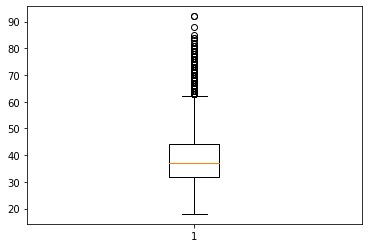

In [6]:
plt.boxplot(data['Age'])


<AxesSubplot:xlabel='Age', ylabel='Count'>

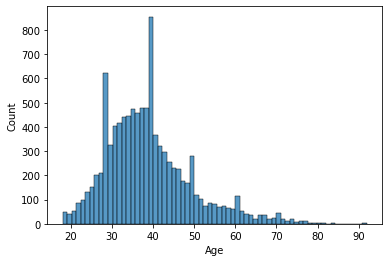

In [9]:
sns.histplot(data['Age'])


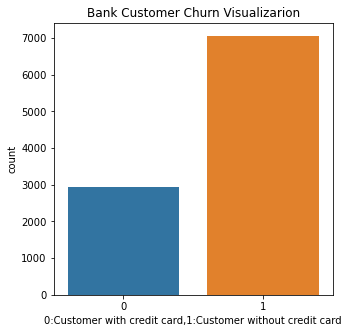

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='HasCrCard',data=data)
plt.xlabel('0:Customer with credit card,1:Customer without credit card')
plt.ylabel('count')
plt.title('Bank Customer Churn Visualizarion')
plt.show()

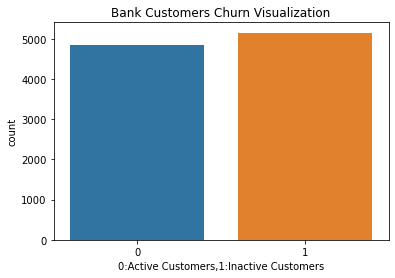

In [11]:
sns.countplot(x='IsActiveMember',data=data)
plt.xlabel('0:Active Customers,1:Inactive Customers')
plt.ylabel('count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [12]:
data[['Gender','Age','Tenure','Balance','EstimatedSalary','Surname']].corr()

,Age,Tenure,Balance,EstimatedSalary
Age,1.000000,-0.009997,0.028308,-0.007201
Tenure,-0.009997,1.000000,-0.012254,0.007784
Balance,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.007201,0.007784,0.012797,1.000000


## Bivariate Analysis

(-1.0, 10.0)

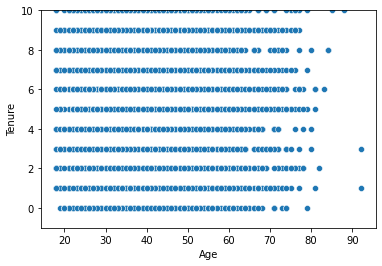

In [13]:
sns.scatterplot(x=data.Age,y=data.Tenure)
plt.ylim(-1,10)

## Multivariate Analysis

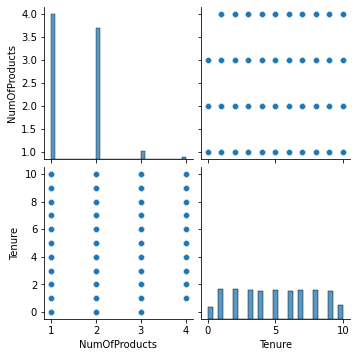

In [14]:
sns.pairplot(data=data[['NumOfProducts','Tenure']])

## Descriptive Statistics

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
data.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [18]:
data.shape

(10000, 14)

## Handling of missing values 

In [19]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Find Outliers and Replace Outliers

In [20]:
def box_scatter(df,x,y):
    fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.scatterplot(data=df,x=x,y=y,ax=ax2)
    

# of Bivariate Outliers: 19


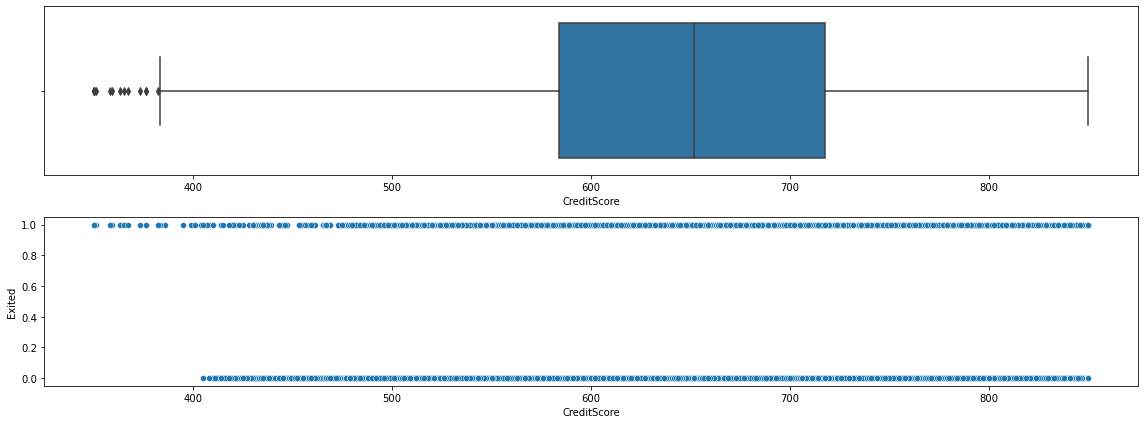

In [21]:
box_scatter(data,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


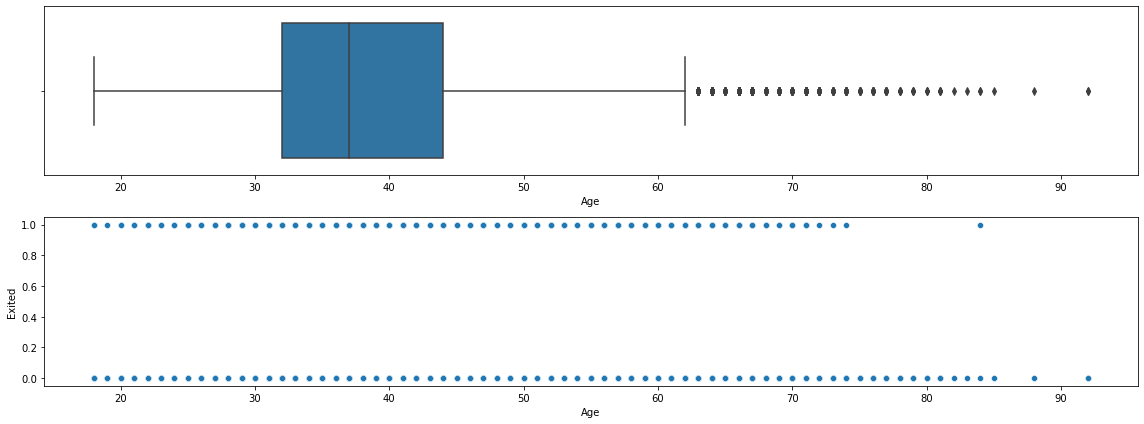

In [22]:
box_scatter(data,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Age']>87])}")

# of Bivariate Outliers: 4


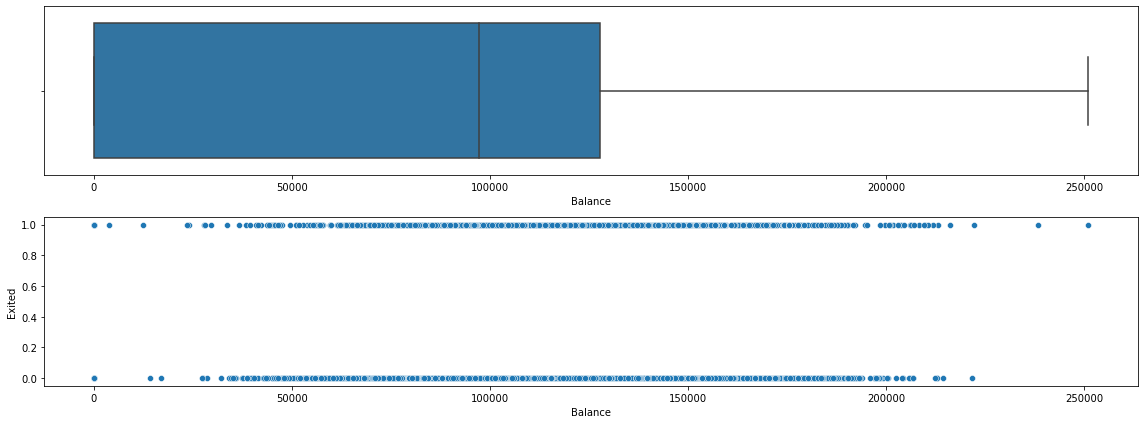

In [23]:
box_scatter(data,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Balance']>220000])}")

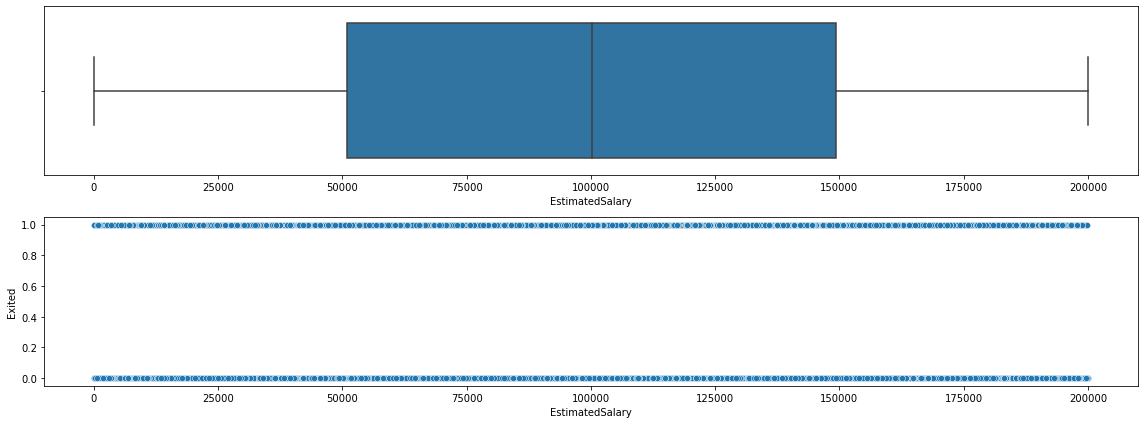

In [24]:
box_scatter(data,'EstimatedSalary','Exited');
plt.tight_layout()

In [25]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3 - q1 
        upper=q3 + 1.5 * iqr 
        lower=q1 - 1.5 * iqr 
        data[i] = np.where(data[i]>upper,upper,data[i])
        data[i] = np.where(data[i]<lower,lower,data[i])

# of Bivariate Outliers: 19


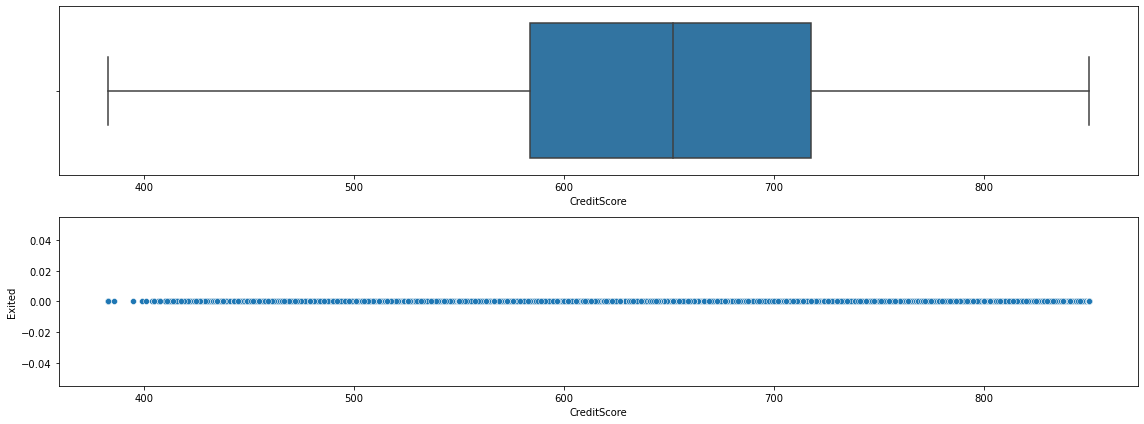

In [26]:
box_scatter(data,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['CreditScore']<400])}")

# of Bivariate Outliers: 0


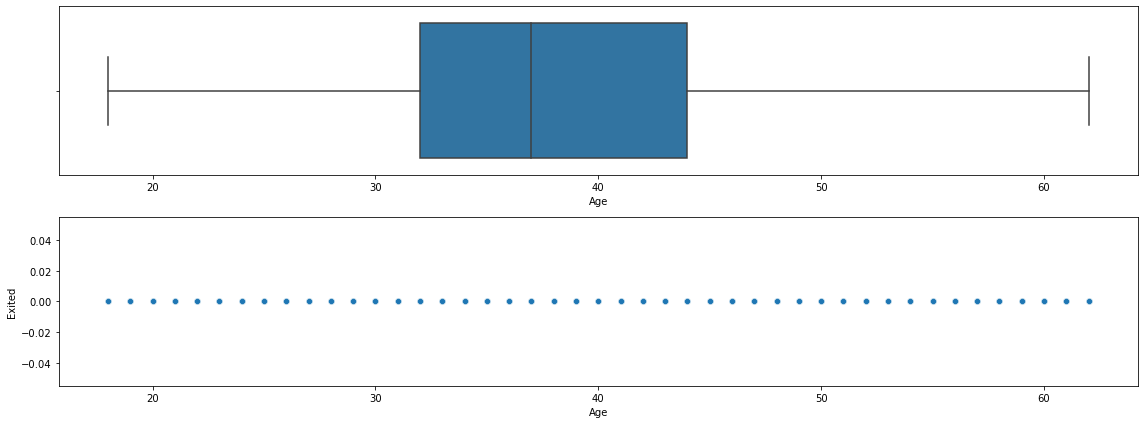

In [27]:
box_scatter(data,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Age']>87])}")

# of Bivariate Outliers: 4


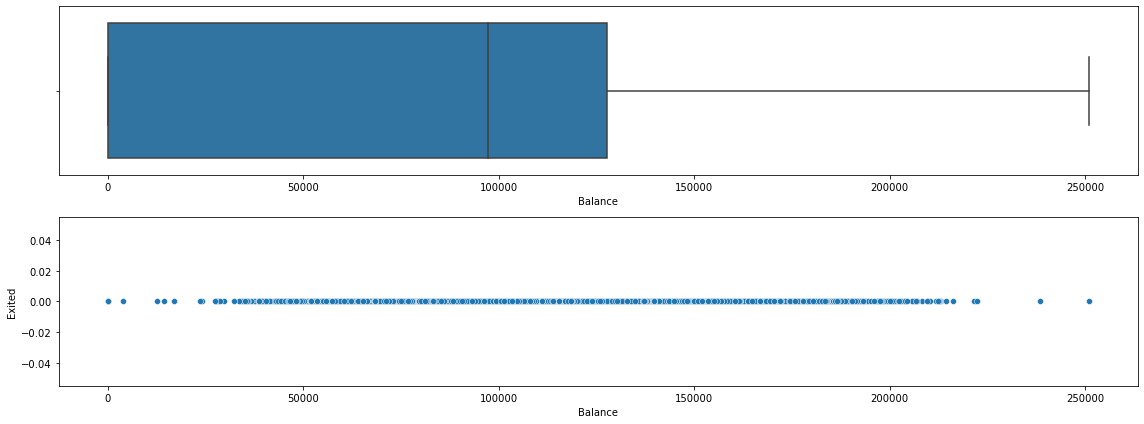

In [28]:
box_scatter(data,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(data.loc[data['Balance']>220000])}")

## Categorical cloumns and perform Encoding


In [29]:
le= LabelEncoder()

In [30]:
data['Surname'] = le.fit_transform(data['Surname'])

In [31]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,1115,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0
1,2.0,15647311.0,1177,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,2040,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0
3,4.0,15701354.0,289,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,1822,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


## Spliting of data into dependent and independent variables

In [40]:
y=data['Exited']
x=data.drop(columns=['Exited'],axis=1)
names=x.columns
names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

## Scale the independent variables

In [41]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,15634602.0,1115,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,2.0,15647311.0,1177,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,3.0,15619304.0,2040,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,4.0,15701354.0,289,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,5.0,15737888.0,1822,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,1999,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,9997.0,15569892.0,1336,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,9998.0,15584532.0,1570,709.0,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,9999.0,15682355.0,2345,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [42]:
x=pd.DataFrame(x,columns=names)
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,15634602.0,1115,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,2.0,15647311.0,1177,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,3.0,15619304.0,2040,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,4.0,15701354.0,289,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,5.0,15737888.0,1822,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


## Spliting of data into training and testing

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)

(8000, 13)
(2000, 13)


In [46]:
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)
